In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from datetime import datetime
sns.set_style('white')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("price_cleaned.csv")

In [3]:
df.head()

,date,symbol,open,close,low,high,volume
0,1/5/2016 0:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,1/6/2016 0:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,1/7/2016 0:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,1/8/2016 0:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,1/11/2016 0:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


In [4]:
df.tail()

,date,symbol,open,close,low,high,volume
851259,12/30/2016,ZBH,103.309998,103.199997,102.849998,103.930000,973800
851260,12/30/2016,ZION,43.070000,43.040001,42.689999,43.310001,1938100
851261,12/30/2016,ZTS,53.639999,53.529999,53.270000,53.740002,1701200
851262,12/30/2016 0:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900
851263,12/30/2016 0:00,FTV,54.200001,53.630001,53.389999,54.480000,705100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null object
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 45.5+ MB


In [6]:
pd.isnull(df).sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [7]:
df['symbol'].nunique()

501

In [8]:
array = ['GOOGL', 'MSFT', 'AMZN', 'CVS']
df2=df.loc[df['symbol'].isin(array)]
df2

,date,symbol,open,close,low,high,volume
284,1/4/2010,AMZN,136.250000,133.899994,133.139999,136.610001,7599900
362,1/4/2010,CVS,32.430000,32.980000,32.380001,33.060001,14676800
440,1/4/2010,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400
544,1/4/2010,MSFT,30.620001,30.950001,30.590000,31.100000,38409100
751,1/5/2010,AMZN,133.429993,134.690002,131.809998,135.479996,8851900
830,1/5/2010,CVS,32.930000,32.849998,32.660000,33.029999,7512000
908,1/5/2010,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300
1012,1/5/2010,MSFT,30.850000,30.959999,30.639999,31.100000,49749600
1219,1/6/2010,AMZN,134.600006,132.250000,131.649994,134.729996,7178800
1298,1/6/2010,CVS,32.450001,32.560001,32.360001,32.980000,11319600


In [9]:
df2.date = pd.to_datetime(df2.date)

In [10]:
df2 = df2.drop('high', axis=1)

In [11]:
df2 = df2.drop('low', axis=1)

In [12]:
df2= df2.drop('volume', axis=1)

In [13]:
df2 = df2.drop('open', axis=1)

In [14]:
df3 = pd.pivot_table(df2,index="date", columns="symbol", values="close").rename_axis(None, axis=1)

In [15]:
df3.head()

,AMZN,CVS,GOOGL,MSFT
date,,,,
2010-01-04,133.899994,32.980000,626.750011,30.950001
2010-01-05,134.690002,32.849998,623.990017,30.959999
2010-01-06,132.250000,32.560001,608.260035,30.770000
2010-01-07,130.000000,33.759998,594.100015,30.450001
2010-01-08,133.520004,34.000000,602.020005,30.660000


In [16]:
df3.describe()

,AMZN,CVS,GOOGL,MSFT
count,1762.000000,1762.000000,1762.000000,1762.000000
mean,337.899058,63.671986,675.583348,37.129841
std,189.109339,26.185976,161.869288,10.810695
min,108.610001,26.980000,436.069999,23.010000
25%,193.377506,37.482501,555.770031,27.840000
50%,282.915008,58.524999,616.500017,33.024999
75%,398.014999,90.885000,762.774979,46.107500
max,844.359985,113.449997,1220.169982,63.619999


In [17]:
df3.head()

,AMZN,CVS,GOOGL,MSFT
date,,,,
2010-01-04,133.899994,32.980000,626.750011,30.950001
2010-01-05,134.690002,32.849998,623.990017,30.959999
2010-01-06,132.250000,32.560001,608.260035,30.770000
2010-01-07,130.000000,33.759998,594.100015,30.450001
2010-01-08,133.520004,34.000000,602.020005,30.660000


In [18]:
import matplotlib.dates as mdates

Calculating correlation

In [19]:
# calculate correlation matrix
df3.corr()

,AMZN,CVS,GOOGL,MSFT
AMZN,1.000000,0.805660,0.395674,0.917427
CVS,0.805660,1.000000,0.236067,0.892104
GOOGL,0.395674,0.236067,1.000000,0.260202
MSFT,0.917427,0.892104,0.260202,1.000000


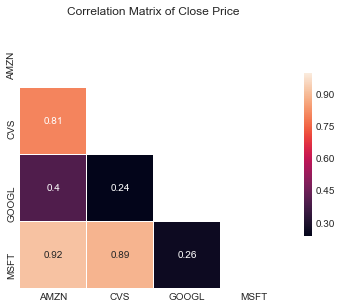

In [20]:
corr = df3.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# plot correlation matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True, 
            cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix of Close Price');

In [21]:
df3.iloc[0,:]

AMZN     133.899994
CVS       32.980000
GOOGL    626.750011
MSFT      30.950001
Name: 2010-01-04 00:00:00, dtype: float64

Simple Return

Simple Return = (Current Price - Purchase Price) / Purchase Price(*100%)

In [22]:
df4 = (df3 - df3.iloc[0,:])/df3.iloc[0,:]*100

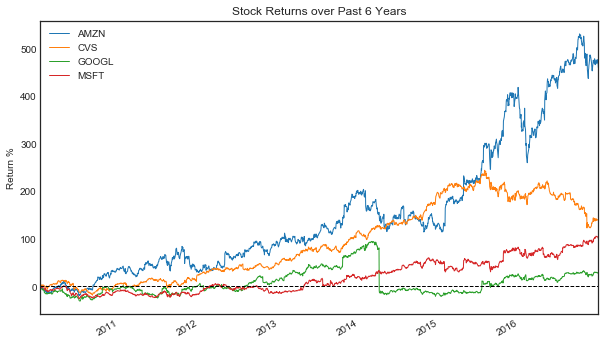

In [23]:
df4.plot(legend=True, figsize=(10, 6), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.xlabel('')
plt.ylabel('Return %')
plt.title('Stock Returns over Past 6 Years');

Annualized Total Return

Annualized Return = (Simple Return + 1) ^ (1 / Years Held) - 1

In [24]:
df4.columns

Index(['AMZN', 'CVS', 'GOOGL', 'MSFT'], dtype='object')

In [25]:
# calculate annualized return with the 6-year simple return
annual_retn = {}
for t in df4.columns:
    annual_retn[t] = ((df4[t][-1:].values/100 + 1)**(1/6) - 1)*100

In [26]:
annual_retn

{'AMZN': array([ 33.26033574]),
 'CVS': array([ 15.65033693]),
 'GOOGL': array([ 3.98712896]),
 'MSFT': array([ 12.31862092])}

In [27]:
y2 = [33.26033574,15.65033693,3.98712896,12.31862092]

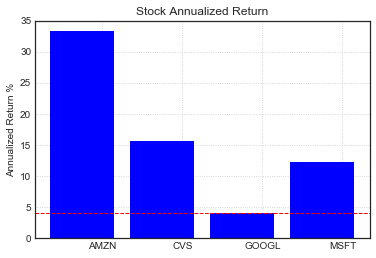

In [28]:
ind = np.arange(len(annual_retn))
width = 0.25
fig, ax = plt.subplots()
ax.bar(ind, y2, color='blue')
plt.axhline(y=annual_retn['GOOGL'], linestyle='dashed', color='red', linewidth=1)
ax.set_ylabel('Annualized Return %')
ax.set_title('Stock Annualized Return')
ax.set_xticks(ind + width)
ax.set_xticklabels(list(annual_retn.keys()))
ax.grid(True, linestyle=':', linewidth=0.85);

Daily Return

Daily Return = (Close Price Today - Close Price Yesterday) / Close Price Yesterday

In [29]:
daily_retn = df3.pct_change().dropna()
print('First 5 rows of the daily return dataset: ')
display(daily_retn.head())

First 5 rows of the daily return dataset: 


,AMZN,CVS,GOOGL,MSFT
date,,,,
2010-01-05,0.005900,-0.003942,-0.004404,0.000323
2010-01-06,-0.018116,-0.008828,-0.025209,-0.006137
2010-01-07,-0.017013,0.036855,-0.023280,-0.010400
2010-01-08,0.027077,0.007109,0.013331,0.006897
2010-01-11,-0.024041,-0.002059,-0.001512,-0.012720


In [30]:
daily_retn.describe()

,AMZN,CVS,GOOGL,MSFT
count,1761.000000,1761.000000,1761.000000,1761.000000
mean,0.001186,0.000575,0.000363,0.000502
std,0.020395,0.012591,0.019656,0.014607
min,-0.126568,-0.118240,-0.496520,-0.113995
25%,-0.009159,-0.006400,-0.007190,-0.007415
50%,0.000578,0.000781,0.000300,0.000000
75%,0.012250,0.007526,0.008384,0.008083
max,0.157457,0.088621,0.162584,0.104522


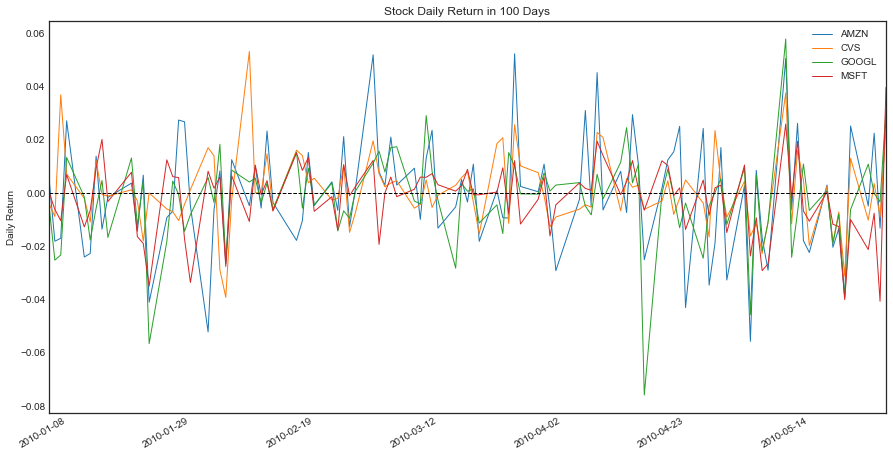

In [31]:
# plot daily return for 100 day period for clarity
daily_retn.iloc[:100].plot(legend=True, figsize=(15, 8), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.ylabel('Daily Return')
plt.xlabel('')
plt.title('Stock Daily Return in 100 Days');

Volatility

Daily Volatility = Standard Deviation of Daily Return
Annualized Volatility = Daily Volatility * Squar Root of Number of Trading Days in a Year

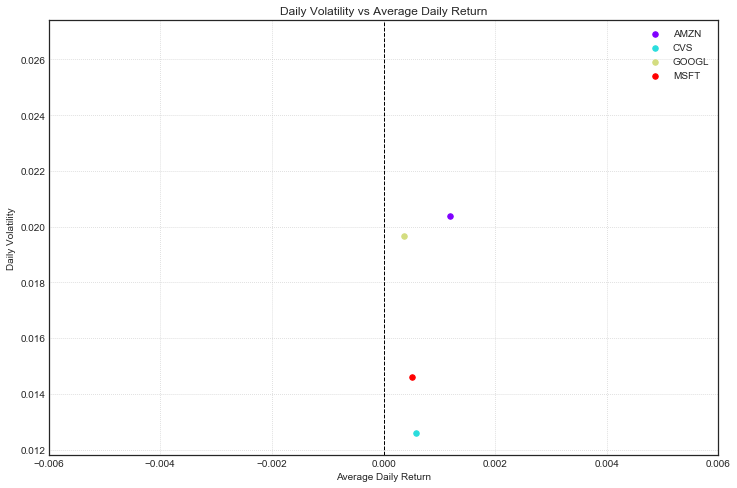

In [32]:
# plot daily volatility vs average daily return
colors = cm.rainbow(np.linspace(0, 1, len(daily_retn.columns)))
fig, ax = plt.subplots(figsize=(12, 8))

for l, x, y, c in zip(daily_retn.columns, 
                      daily_retn.mean(), 
                      daily_retn.std(), 
                      colors):
    plt.scatter(x, y, color=c, s=30, label=l)

plt.axvline(x=0, linewidth=1, linestyle='dashed', color='black')

ax.grid(True, linestyle=':', linewidth=0.75)
plt.xlim([-0.006, 0.006])
plt.xlabel('Average Daily Return')
plt.ylabel('Daily Volatility')
plt.title('Daily Volatility vs Average Daily Return')
plt.legend();